<a href="https://colab.research.google.com/github/dewshishir/new-practice/blob/main/class_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [5]:
input_image_path = '/content/drive/MyDrive/train/canvas-print-sunflower-natural-background-sunflower-blooming-close-up-i228134.jpg'

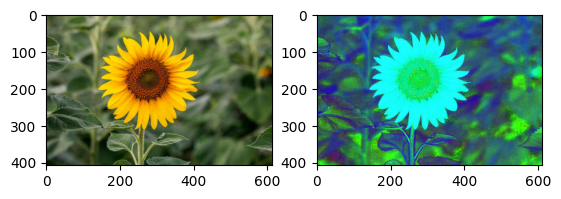

In [7]:
Image = cv.imread(input_image_path)
img_rgb = cv.cvtColor(Image, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV) #hsv te niye jacchi ekta karonei ta holo colour gulo jeno ekta channel e thake

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_hsv)


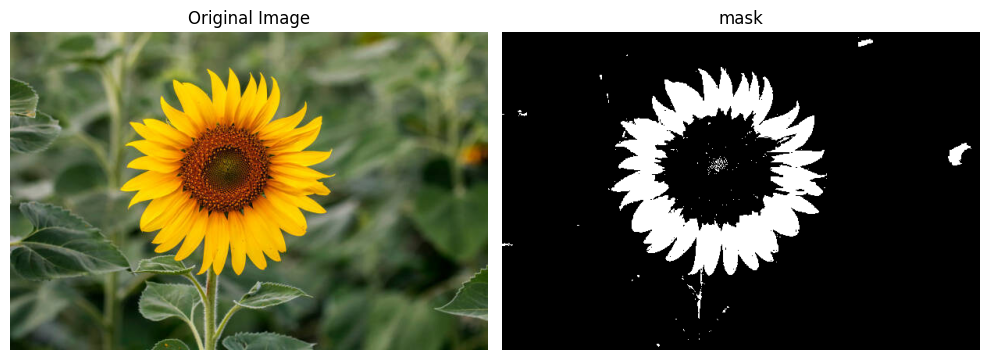

In [10]:
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

thresholded = cv.inRange(img_hsv, lower_yellow, upper_yellow)
#binary masak
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.title('mask')
plt.axis('off')

plt.tight_layout()

In [42]:
height, width ,ch = Image.shape
print(height, width)
mask = np.zeros((height, width), dtype=np.uint8)
#roi region of interest
square_size = 100
top_left_x = (width - square_size) // 2
top_left_y = (height - square_size) // 2

mask[top_left_y:top_left_y + square_size ,top_left_x:top_left_x + square_size] = 255

408 612


In [43]:
print(mask[top_left_y:top_left_y + square_size ,top_left_x:top_left_x + square_size])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
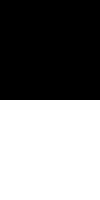

In [44]:
mask[top_left_y-square_size:top_left_y + square_size ,top_left_x:top_left_x + square_size]

In [45]:
print(mask[top_left_y-square_size:top_left_y + square_size ,top_left_x:top_left_x + square_size])

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


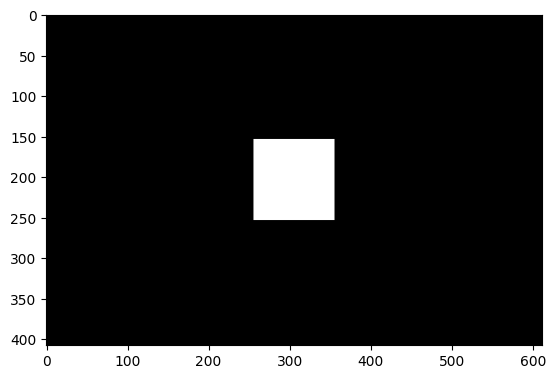

In [46]:
plt.imshow(mask, cmap='gray')


In [47]:
mask.shape

(408, 612)

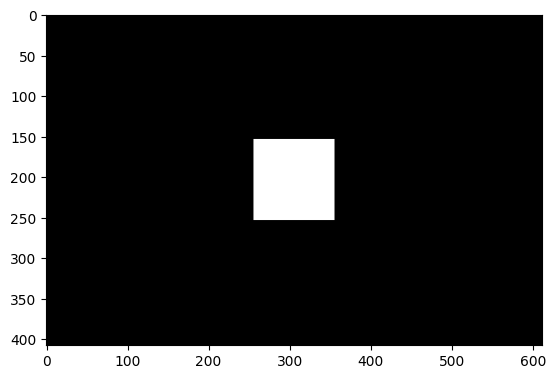

In [49]:
mask_rgb = cv.cvtColor(mask, cv.COLOR_GRAY2RGB)
plt.imshow(mask_rgb)

In [52]:
print(mask_rgb.shape)

(408, 612, 3)


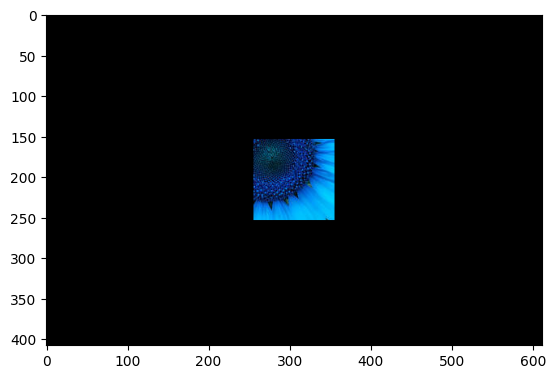

In [56]:
masked_image = cv.bitwise_and(Image,mask_rgb)
plt.imshow(masked_image)

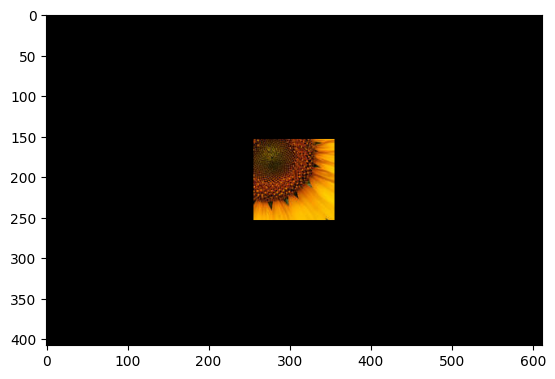

In [57]:
masked_image = cv.bitwise_and(img_rgb,mask_rgb)
plt.imshow(masked_image)